# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy import stats
from scipy.stats import norm
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

(13270.422265141257, 12105.484975561605)

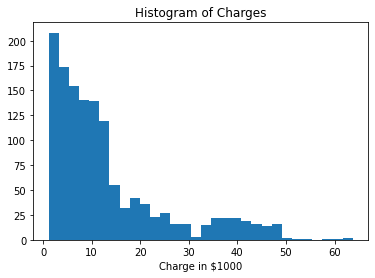

In [12]:
_=plt.hist(medical.charges/1000,bins=30)
_=plt.title('Histogram of Charges')
_=plt.xlabel('Charge in $1000')
(np.mean(medical.charges),np.std(medical.charges))

In [8]:
# Well, the Standard deviation is very close to the mean which is not usually a good news. and the distribution is not symmetric and skewed 
# with a long high tail. this high value tails increase the mean so a better stat would be the median
np.median(medical.charges)

9382.033

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [32]:
stdMean=np.std(medical.charges,ddof=1)/np.sqrt(len(medical.charges))
print(len(medical.charges))
stdMean

1338


331.06745431568226

__A:__ They Shouldn't be concerned as long as it is not at least 2*Standard Deviation of the mean (almost 95%) below the mean they expect.
In Other words the high variance we see in our sample (which already has a large size of 1338) suggest we might see high range of the average for our different sample. All because a few rare events with high charge can shift the average alot from sample to sample.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

as the mean of the samples due to CLT make a normal distribution we can perform a one tailed z-test. 
(we don't want the avg to be below $1200. do not mind if it is as much above it as possible) 

13270.422265141257 331.06745431568226


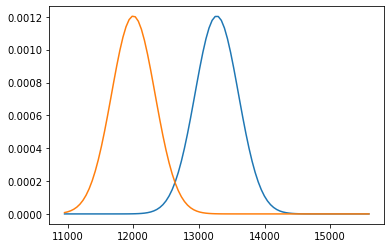

In [33]:
mean=np.mean(medical.charges)
sigma=stdMean

x = np.linspace(mean - 7*sigma, mean + 7*sigma, 100)
xh = np.linspace(1200 - 5*sigma, 1200 + 5*sigma, 100)
print(mean,sigma)
_=plt.plot(x, norm.pdf(x, mean, sigma))
_=plt.plot(x, norm.pdf(x, 12000, sigma))

In [35]:
print(norm.cdf(1200,mean,sigma))
norm.cdf(13270,1200,sigma)  # the actual mean of 12000 is never! gives a mean of 13270 for 1338 observations
#and based on our sample the chance to have a actual mean of 1200 is extremely unlikely 

2.467739163012381e-291


1.0

In [46]:
#we can also use a z_score
z_score = norm.ppf(0.95,loc=0,scale=1)   
print('one sided z score of 0.95: ', z_score)  #1.645 one sided   1.96 two sided
errorMargin = z_score * stdMean
lowerBound95=np.mean(medical.charges) - errorMargin
print('95% margin of error :',round(errorMargin,2))
print('we can say with 95% confidence that our actual mean is more than ',round(lowerBound95,2))

one sided z score of 0.95:  1.6448536269514722
95% margin of error : 544.56
we can say with 95% confidence that our actual mean is more than  12725.86


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  Null Hypothesis: The distribution of uninsured charges is the same as the distribution of the insured charges. Alternative hypothesis: the two distribution are not the same and one group pay more than the other.
in t-statistics we assume the homogenity of the variances , that they are similar and we use a pooled variance to use for both populations. (here our data samples shows significantly different values for the two groups though) 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [58]:
insured = medical[medical.insuranceclaim ==1]
uninsured = medical[medical.insuranceclaim ==0]
uninsured.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [59]:
#stats of each group
std_1 = np.std(insured.charges)
std_2 = np.std(uninsured.charges)
n_1 = len(insured.charges)
n_2 = len(uninsured.charges)
mean_1 = np.mean(insured.charges)
mean_2 = np.mean(uninsured.charges)
print(n_1,' insured, charges of  :', mean_1, ' +- ',std_1 )
print(n_2,'Uninsured, charges of :', mean_2, ' +- ',std_2 )

783  insured, charges of  : 16423.928276537663  +-  14036.956250260411
555 Uninsured, charges of : 8821.421892306294  +-  6440.699841605233


In [90]:
#manual T test based on the given relation using pooled variance
sp= np.sqrt(((n_1-1) * std_1**2 + (n_2-1) * std_2**2)/(n_1+n_2-2))
print(sp) # this is almost twice the std_2 not a good approximation
t_score = (mean_1 - mean_2)/(sp * np.sqrt(1/n_1 +1/n_2))

P=1-norm.cdf(t_score)
print(t_score,P)
print(1-norm.cdf(1.645))
# t score of 1.65 makes p=0.05  and the difference would be statistically significant.
#we have a much higher t score the null hypotesis is rejected (with a p close to zero)

11512.282899205744
11.901306943555385 0.0
0.04998490553912138


In [88]:
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(mean1=mean_1, std1=std_1, nobs1=n_1,
                     mean2=mean_2, std2=std_2, nobs2=n_2)


Ttest_indResult(statistic=11.901306943555387, pvalue=4.090550214373679e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ we use t test two compare two indipendant samples and decide wether they can have a same underlying populations or they are different in nature.
For z-test we do not compare the two samples we merely find the z score to find a statistically significant observation in the sample that is above or below some thereshold (assuming the underlying distribution is normal).
though there is not similar z-test on scipy.stats there is one in statsmodels.stats.weightstats.ztest where given a significance level (p value it says what should be a z score so that the result be statistically significant)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test